 <div style="text-align: center ">Hands on : Social Network Analytics </div>

<div style="text-align: center ">                        Class Tutorial Part 4 </div>
 <div style="text-align: center "> Network Analysis and Mining  (Elective 6: 6th Semester CSE, 2023) </div>
  <div style="text-align: center "> Analysis of a social graph using Unit 1-3 concepts </div>
 <div style="text-align: center "> Bhaskarjyoti Das </div>
<div style="text-align: center "> PES University </div>

<div style="text-align: center "> Disclaimer : The material is borrowed, adapted, modified and further developed using various tutorials at Networkx sites and elsewhere </div>



In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.6.3


In [2]:
import networkx as nx

# Exercise - illustrate paths in the Florentine families graph

Shortest paths are not unique, we can have more of one path with the same length. You can use **nx.all_shortest_paths** to get all shortest paths.

In [3]:
G = nx.florentine_families_graph()


In [4]:
pos_spring = nx.spring_layout(G)
pos_fr = nx.fruchterman_reingold_layout(G)
pos_fr

{'Acciaiuoli': array([ 0.39804161, -0.46922983]),
 'Medici': array([ 0.10482104, -0.10041407]),
 'Castellani': array([-0.64805603, -0.51478919]),
 'Peruzzi': array([-0.71408954, -0.19802116]),
 'Strozzi': array([-0.48466211, -0.27510834]),
 'Barbadori': array([-0.25645168, -0.50237974]),
 'Ridolfi': array([-0.07527868, -0.29079263]),
 'Tornabuoni': array([ 0.2592954 , -0.12120308]),
 'Albizzi': array([0.56442311, 0.10886639]),
 'Salviati': array([-0.1269949 ,  0.45316851]),
 'Pazzi': array([-0.29532637,  0.85715088]),
 'Bischeri': array([-0.34526339,  0.03189994]),
 'Guadagni': array([0.20124989, 0.23205834]),
 'Ginori': array([1.        , 0.17474069]),
 'Lamberteschi': array([0.41829165, 0.61405329])}

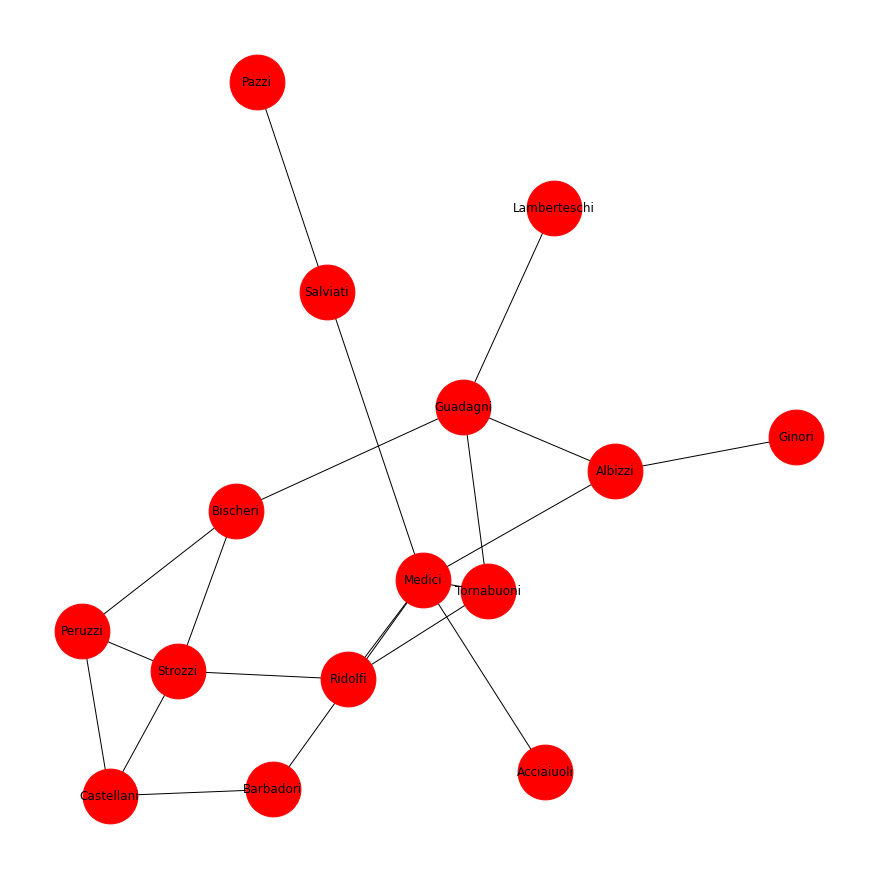

In [5]:
plt.figure(figsize=(12,12))
nx.draw(G, pos=pos_fr, node_size=3000, node_color='red', with_labels=True)

In [6]:
source = 'Medici'
target = 'Peruzzi'
nx.shortest_path(G, source, target)

['Medici', 'Barbadori', 'Castellani', 'Peruzzi']

In [7]:
# Shortest paths are not unique
list(nx.all_shortest_paths(G, source, target))

[['Medici', 'Barbadori', 'Castellani', 'Peruzzi'],
 ['Medici', 'Ridolfi', 'Strozzi', 'Peruzzi']]

In [8]:
def plot_paths(G, paths):
    plt.figure(figsize=(12,12))
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=3000, node_color='yellow')
    nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G})
    # Draw edges
    nx.draw_networkx_edges(G, pos=pos)
    for path in paths:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=3)
    ax = plt.gca()
    ax.set_axis_off()
    ax.grid(None)

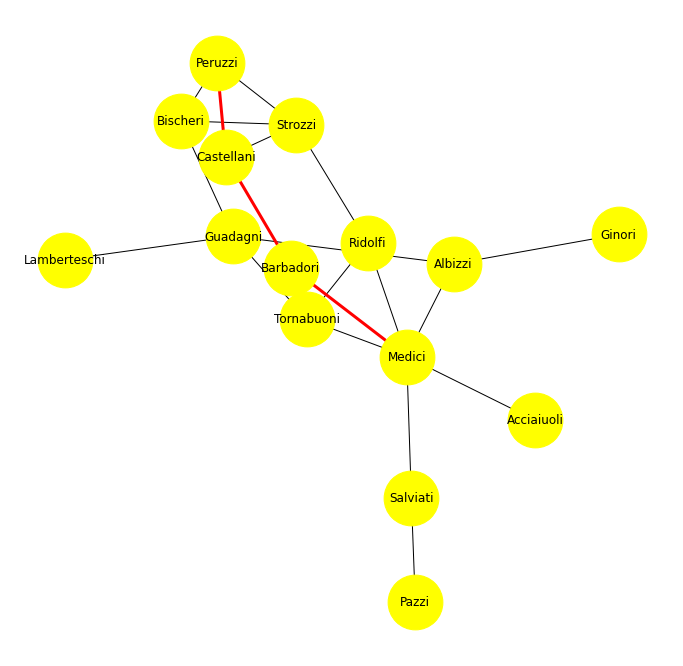

In [9]:
plot_paths(G, [nx.shortest_path(G, source, target)])

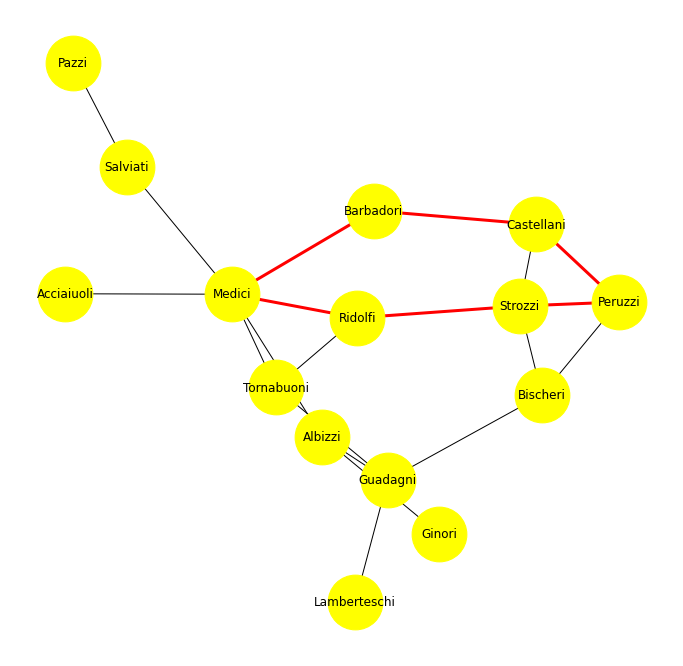

In [10]:
plot_paths(G, nx.all_shortest_paths(G, source, target))

In [11]:
for i, path in enumerate(nx.all_simple_paths(G, source, target), 1):
    print(i, path)

1 ['Medici', 'Barbadori', 'Castellani', 'Peruzzi']
2 ['Medici', 'Barbadori', 'Castellani', 'Strozzi', 'Peruzzi']
3 ['Medici', 'Barbadori', 'Castellani', 'Strozzi', 'Ridolfi', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Peruzzi']
4 ['Medici', 'Barbadori', 'Castellani', 'Strozzi', 'Bischeri', 'Peruzzi']
5 ['Medici', 'Ridolfi', 'Strozzi', 'Castellani', 'Peruzzi']
6 ['Medici', 'Ridolfi', 'Strozzi', 'Peruzzi']
7 ['Medici', 'Ridolfi', 'Strozzi', 'Bischeri', 'Peruzzi']
8 ['Medici', 'Ridolfi', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Peruzzi']
9 ['Medici', 'Ridolfi', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Strozzi', 'Castellani', 'Peruzzi']
10 ['Medici', 'Ridolfi', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Strozzi', 'Peruzzi']
11 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Castellani', 'Peruzzi']
12 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Peruzzi']
13 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Bischeri', 'Peruzzi']
14 ['Medici', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Peruzzi']
15 ['Medic

In [12]:
for i, path in enumerate(nx.shortest_simple_paths(G, source, target), 1):
    print(i, path)

1 ['Medici', 'Barbadori', 'Castellani', 'Peruzzi']
2 ['Medici', 'Ridolfi', 'Strozzi', 'Peruzzi']
3 ['Medici', 'Barbadori', 'Castellani', 'Strozzi', 'Peruzzi']
4 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Peruzzi']
5 ['Medici', 'Ridolfi', 'Strozzi', 'Castellani', 'Peruzzi']
6 ['Medici', 'Albizzi', 'Guadagni', 'Bischeri', 'Peruzzi']
7 ['Medici', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Peruzzi']
8 ['Medici', 'Ridolfi', 'Strozzi', 'Bischeri', 'Peruzzi']
9 ['Medici', 'Ridolfi', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Peruzzi']
10 ['Medici', 'Barbadori', 'Castellani', 'Strozzi', 'Bischeri', 'Peruzzi']
11 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Castellani', 'Peruzzi']
12 ['Medici', 'Albizzi', 'Guadagni', 'Bischeri', 'Strozzi', 'Peruzzi']
13 ['Medici', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Strozzi', 'Peruzzi']
14 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Bischeri', 'Peruzzi']
15 ['Medici', 'Albizzi', 'Guadagni', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Peruzzi']
16 ['Medici', 'Ri

# Exercise - illustrate components in Florentine families graph


In [13]:
#G = nx.florentine_families_graph()

In [14]:
a = nx.is_connected(G)
s='\n Is a connected graph: ' +repr(a)
print (s)

no=len(list(nx.connected_components(G)))
s='\n no of connected components: ' +repr(no)
print (s)

#Gecum13ate a sorted list of connected components, largest first 
CoC=sorted(nx.connected_components(G), key = len, reverse=True)
for item in CoC:
    cclen=len(item)
    s= "\n Connected component length:" +repr(cclen)
    print (s)
    print ("\n Connected component :")
    print (item)



 Is a connected graph: True

 no of connected components: 1

 Connected component length:15

 Connected component :
{'Albizzi', 'Salviati', 'Guadagni', 'Ridolfi', 'Pazzi', 'Lamberteschi', 'Strozzi', 'Ginori', 'Acciaiuoli', 'Bischeri', 'Barbadori', 'Castellani', 'Peruzzi', 'Medici', 'Tornabuoni'}


In [15]:
# The florentine families graph is connected, thus all nodes are in the same connected component.
list(nx.connected_components(G))

[{'Acciaiuoli',
  'Albizzi',
  'Barbadori',
  'Bischeri',
  'Castellani',
  'Ginori',
  'Guadagni',
  'Lamberteschi',
  'Medici',
  'Pazzi',
  'Peruzzi',
  'Ridolfi',
  'Salviati',
  'Strozzi',
  'Tornabuoni'}]

In [16]:
## Clique Percolation method : find community using 3 clique

In [17]:
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 3))
print(c)

[frozenset({'Castellani', 'Peruzzi', 'Strozzi', 'Bischeri'}), frozenset({'Medici', 'Tornabuoni', 'Ridolfi'})]


In [18]:
print(list(c[0]))
print(list(c[1]))
 

['Castellani', 'Peruzzi', 'Strozzi', 'Bischeri']
['Medici', 'Tornabuoni', 'Ridolfi']


In [19]:
from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['Acciaiuoli',
  'Albizzi',
  'Ginori',
  'Guadagni',
  'Lamberteschi',
  'Medici',
  'Ridolfi',
  'Tornabuoni'],
 ['Barbadori', 'Bischeri', 'Castellani', 'Peruzzi', 'Strozzi'],
 ['Pazzi', 'Salviati']]

# Exercise - Analyze network for Florentine families graph


In [20]:
diameter = (nx.diameter(G))
print(diameter)

5


In [21]:
density= (nx.density(G))
print(density)

0.19047619047619047


In [22]:
# Local clustering 
print(nx.clustering(G))

{'Acciaiuoli': 0, 'Medici': 0.06666666666666667, 'Castellani': 0.3333333333333333, 'Peruzzi': 0.6666666666666666, 'Strozzi': 0.3333333333333333, 'Barbadori': 0, 'Ridolfi': 0.3333333333333333, 'Tornabuoni': 0.3333333333333333, 'Albizzi': 0, 'Salviati': 0, 'Pazzi': 0, 'Bischeri': 0.3333333333333333, 'Guadagni': 0, 'Ginori': 0, 'Lamberteschi': 0}


In [23]:
# Global clustering coefficient 
print(nx.average_clustering(G))

0.16


In [24]:
# ratio of observed closed triplets to maxm possible number of closed triplets in the graph 
tr=nx.transitivity(G)
s='\n  transitivity: ' + repr(tr)
print (s)



  transitivity: 0.19148936170212766


In [25]:
s='\n Transitivity  analysis: '
print (s)

# which are the nodes that are contributing in the transitivity ?
t=nx.triangles(G)
s='\n No of triads that include node as a vertex : ' +repr(t)
print (s)



 Transitivity  analysis: 

 No of triads that include node as a vertex : {'Acciaiuoli': 0, 'Medici': 1, 'Castellani': 1, 'Peruzzi': 2, 'Strozzi': 2, 'Barbadori': 0, 'Ridolfi': 1, 'Tornabuoni': 1, 'Albizzi': 0, 'Salviati': 0, 'Pazzi': 0, 'Bischeri': 1, 'Guadagni': 0, 'Ginori': 0, 'Lamberteschi': 0}


# Exercise : degree distribution


In [26]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)


Nodes:  15
Edges:  20
Average degree:  1.3333333333333333


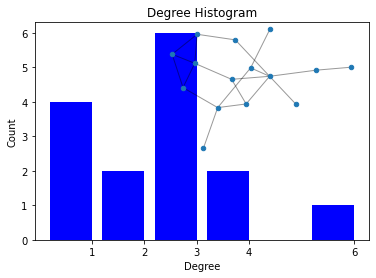

In [27]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G.subgraph(c) for c in nx.connected_components(G))
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

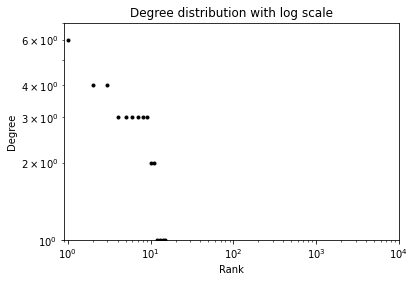

In [28]:
########################################################################
# Degree distribution 
########################################################################

degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

# loglog tells matplotlib to use log scales.
# The x values, range(1,10001), are the ranks, 
# and the degree_sequence are the y values.
# The String 'k.' means use black (k) dots (.)
'''
Now we need to do some plotting. Plotting using matplotlib is a lot like 
plotting using MATLAB. Because the degree distribution of a BA graph is a 
power-law, we'd like to use a plot with log scales. Here is how we'd do it.

'''
plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
plt.savefig("degree_distribution.png")

# Exercise :  Centrality Scatter plot 

In [29]:
#Centrality scatter plot 
def centrality_scatter(dict1,dict2,path="",ylab="",xlab="",title="",line=False):
    # Create figure and drawing axis
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    # Create items and extract centralities
    items1 = sorted(dict1.items())
    items2 = sorted(dict2.items())
    xdata=[b for a,b in items1]
    ydata=[b for a,b in items2]
    # Add each actor to the plot by ID
    for p in range(len(items1)):
        ax1.text(x=xdata[p], y=ydata[p],s=str(items1[p][0]), color="b")
        if line:
            # use NumPy to calculate the best fit
            slope, yint = plt.polyfit(xdata,ydata,1)
            xline = plt.xticks()[0]
            yline = map(lambda x: slope*x+yint,xline)
            ax1.plot(xline,yline,ls='--',color='b')
        # Set new x- and y-axis limits
    plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
    plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
    # Add labels and save
    ax1.set_title(title)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    plt.savefig(path)    


In [30]:
cc=nx.closeness_centrality(G)
dc=nx.degree_centrality(G)
bc = nx.betweenness_centrality(G)
ec = nx.eigenvector_centrality(G,max_iter=1000)

sorted_dc=sorted(dc.items())
sorted_bc=sorted(bc.items())
sorted_cc=sorted(cc.items())
sorted_ec=sorted(ec.items())

#extract the centralities
deg_data=[y for x,y in sorted_dc]
close_data=[y for x,y in sorted_cc]
betw_data=[y for x,y in sorted_bc]
eig_data=[y for x,y in sorted_ec]



In [31]:
from scipy.stats.stats import pearsonr

r1=pearsonr(deg_data,betw_data)
s= "\n Pearson Correlation Coeff deg and betweenness: " + repr(r1)
print (s)

r2=pearsonr(deg_data,close_data)
s= "\n Pearson Correlation Coeff deg and closeness: " + repr(r2)
print (s)


r3=pearsonr(betw_data,close_data)
s= "\n Pearson Correlation Coeff betweennness and closeness: " + repr(r3)
print (s)

r4=pearsonr(betw_data,eig_data)
s= "\n Pearson Correlation Coeff betweennness and eigenvector : " + repr(r4)
print (s)




 Pearson Correlation Coeff deg and betweenness: (0.8441513289848926, 7.575095714865155e-05)

 Pearson Correlation Coeff deg and closeness: (0.8245138298922935, 0.00015582981906258532)

 Pearson Correlation Coeff betweennness and closeness: (0.8066296471635478, 0.0002796697223251082)

 Pearson Correlation Coeff betweennness and eigenvector : (0.6655010682819834, 0.006772196960711744)


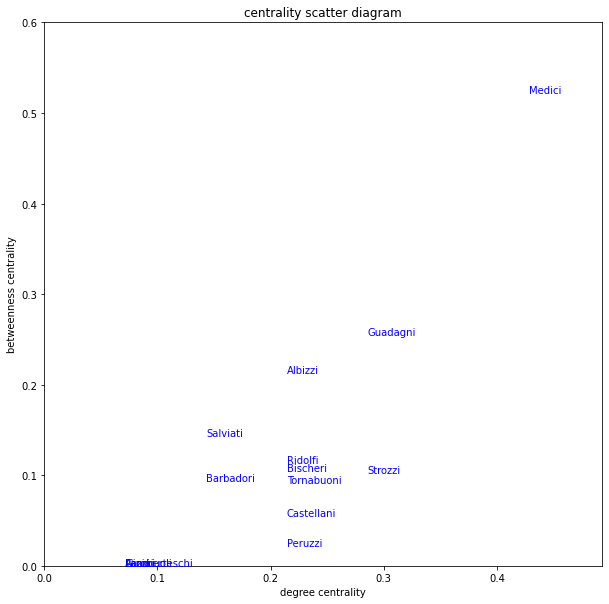

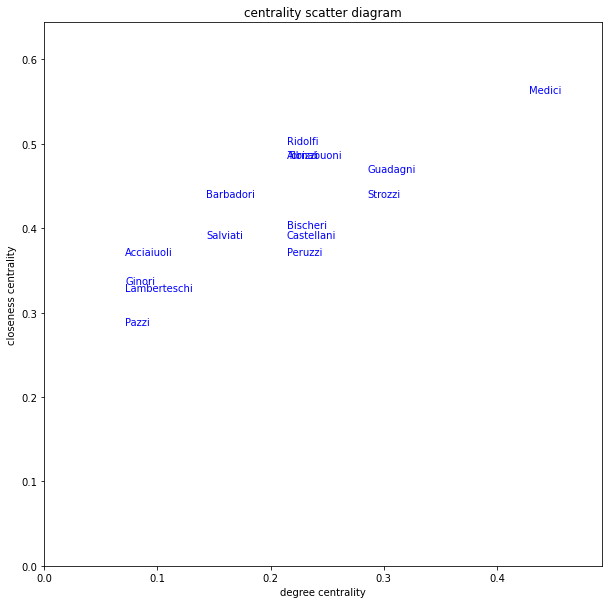

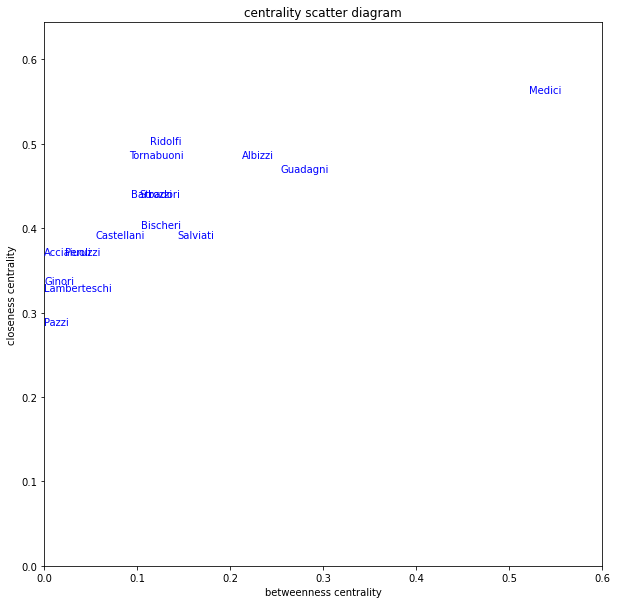

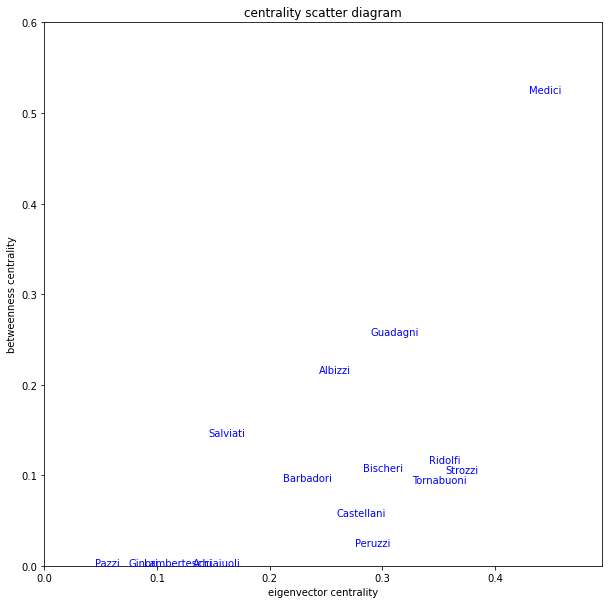

In [32]:
##########################
# Draw centrality scatter 
centrality_scatter(dc,bc,path="cum18bcdc",ylab="betweenness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(dc,cc,path="cum18ccdc",ylab="closeness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(bc,cc,path="cum18ccbc",ylab="closeness centrality",xlab="betweenness centrality",title="centrality scatter diagram",line=False)
centrality_scatter(ec,bc,path="cum18bcec",ylab="betweenness centrality",xlab="eigenvector centrality",title="centrality scatter diagram",line=False)


# Exercise :  Find Specific Ego Network 

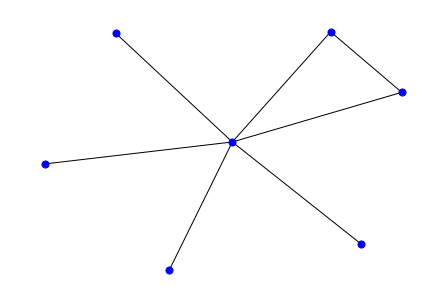

In [33]:
s='Medici'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
plt.savefig('Medici.png')
plt.show()
nx.write_gml(hub_ego,"egonw_medici.gml")



In [34]:
no_node=len(hub_ego.nodes())
no_edges=len(hub_ego.edges())
print("Medici's Ego Network : nodes", no_node)
print("Medici's Ego Network : edges", no_edges)

Medici's Ego Network : nodes 7
Medici's Ego Network : edges 7


# Exercise :  Compare with random graph models ¶

In [35]:
nodes=G.number_of_nodes()
nodes

15

In [36]:
#calculate average degree to use with random graph models 

degree_list = list(nx.degree(G))
#print(degree_list)
no_nodes=len(degree_list)
total_degree=0
for node in degree_list[:5]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/no_nodes
avg_degree

Node  Acciaiuoli  : Degree is  1
Node  Medici  : Degree is  6
Node  Castellani  : Degree is  3
Node  Peruzzi  : Degree is  3
Node  Strozzi  : Degree is  4


1.1333333333333333

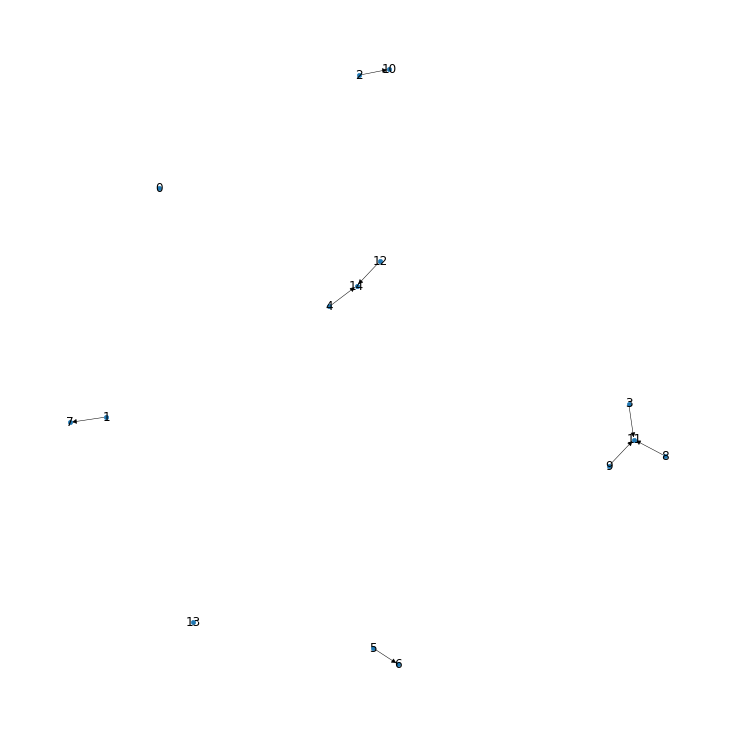

In [37]:
#note that no_nodes-1
p=avg_degree/(no_nodes-1)
#G2 = nx.erdos_renyi_graph(no_nodes,p)  # same call 
G2 = nx.gnp_random_graph(no_nodes,p)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = True, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()


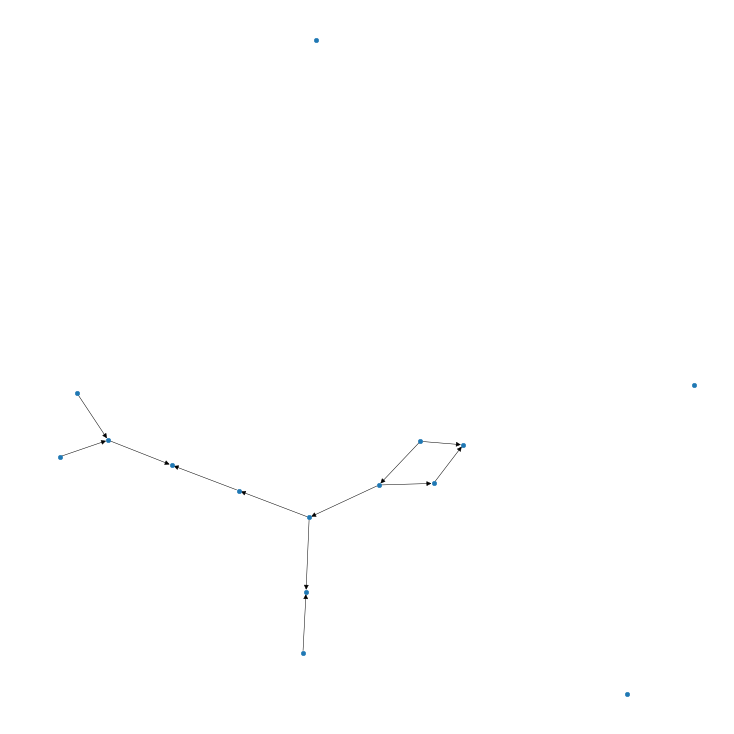

In [38]:
#Make random graph 
G2 = nx.gnp_random_graph(no_nodes,0.1)
#assuming probability for node creation 0.1 
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()


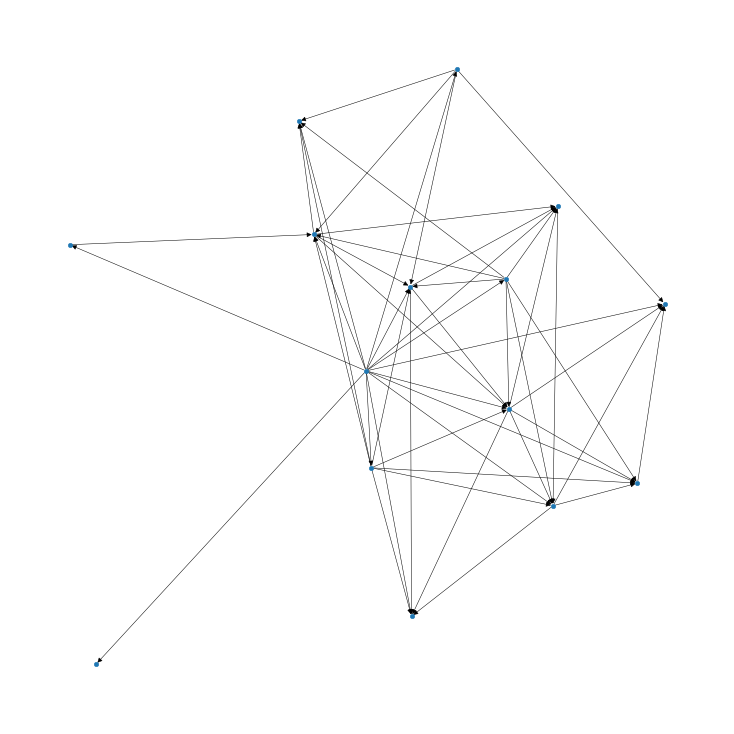

In [39]:
#parameters n (int) – Number of nodes, m (int) – Number of edges to attach from a new node to existing nodes
neighbours=5
H1 = nx.barabasi_albert_graph(no_nodes,neighbours)
fig = plt.figure(figsize =(10 ,10))
nx.draw(H1, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

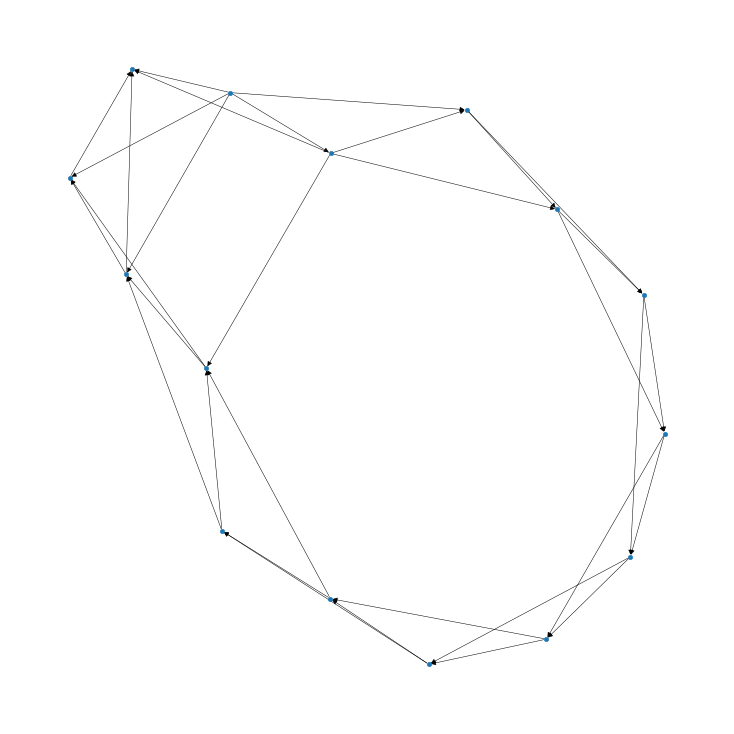

In [40]:
#parameters : n (int) – The number of nodes, (int) – 
# paramters : Each node is joined with its k nearest neighbors in a ring topology
H2 = nx.newman_watts_strogatz_graph(no_nodes,neighbours,p)
fig = plt.figure(figsize =(10 ,10))

nx.draw(H2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

In [41]:
#transitivity comaprison 
print(nx.transitivity(G))
print(nx.transitivity(H1))
print(nx.transitivity(H2))
print(nx.average_clustering(G))
print(nx.average_clustering(H1))
print(nx.average_clustering(H2))
print(nx.diameter(G))
print(nx.diameter(H1))
print(nx.diameter(H2))
print(nx.degree_pearson_correlation_coefficient(G))
print(nx.degree_pearson_correlation_coefficient(H1))
print(nx.degree_pearson_correlation_coefficient(H2))

0.19148936170212766
0.5915492957746479
0.4811320754716981
0.16
0.6450508750508752
0.4955555555555556
5
2
4
-0.37483787289234755
-0.365149833518313
0.1272727272727273


## Loading few other dataset format  
Check out https://networkrepository.com/


Many dataset are in Matrix Market format and some of the files that can be downloaded from that source are somewhat non-standard and needs small fixes.  Header of the file has to start with %% and no space at the beginning of line

%%MatrixMarket matrix coordinate pattern symmetric

with a double %

In [52]:
from scipy.io import mmread
#C:\Users\Bhaskar\Desktop\2023_Jan_July\NAM_2023\SharedCode\Unit1_3
file = "ca-AstroPh.mtx"
adj_matrix = mmread(file)

In [53]:
import pandas as pd
graph = nx.from_scipy_sparse_matrix(adj_matrix)
degrees = dict(nx.degree(graph))
ci = nx.clustering(graph)
centrality = nx.centrality.eigenvector_centrality(graph)
stats = pd.DataFrame({
    "centrality": centrality, 
    "C_i": ci, 
    "degree": degrees
})
stats.head()

,centrality,C_i,degree
0,8.901198e-05,0.692137,43
1,3.208282e-10,1.000000,2
2,3.407931e-04,0.242424,12
3,4.290384e-06,0.000000,1
4,6.722036e-07,1.000000,2


In [54]:
nx.write_gexf(graph, 'ca-AstroPh.gexf')

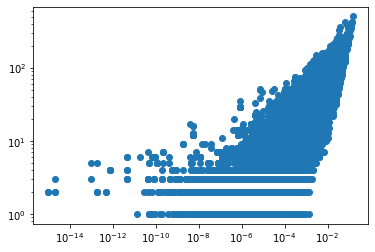

In [55]:
plt.plot(stats["centrality"], stats["degree"], 'o')
plt.xscale("log")
plt.yscale("log")

In [56]:
# Louvain Algorithm 
import community  # You need to instal this separate this
#first compute the best partition
part = community.best_partition(graph)
print(part)

{0: 0, 1: 1, 2: 2, 3: 1, 4: 3, 5: 1, 6: 4, 7: 5, 8: 5, 9: 6, 10: 3, 11: 5, 12: 7, 13: 8, 14: 8, 15: 12, 16: 10, 17: 5, 18: 1, 19: 1, 20: 11, 21: 4, 22: 4, 23: 12, 24: 13, 25: 14, 26: 1, 27: 9, 28: 4, 29: 12, 30: 5, 31: 5, 32: 21, 33: 17, 34: 1, 35: 21, 36: 21, 37: 5, 38: 5, 39: 2, 40: 18, 41: 10, 42: 0, 43: 21, 44: 19, 45: 11, 46: 6, 47: 5, 48: 34, 49: 18, 50: 6, 51: 18, 52: 3, 53: 21, 54: 11, 55: 2, 56: 8, 57: 2, 58: 21, 59: 3, 60: 12, 61: 17, 62: 16, 63: 2, 64: 2, 65: 3, 66: 3, 67: 9, 68: 5, 69: 2, 70: 2, 71: 7, 72: 10, 73: 12, 74: 3, 75: 17, 76: 14, 77: 21, 78: 21, 79: 21, 80: 9, 81: 18, 82: 7, 83: 12, 84: 12, 85: 18, 86: 1, 87: 23, 88: 14, 89: 12, 90: 17, 91: 12, 92: 5, 93: 5, 94: 24, 95: 25, 96: 5, 97: 26, 98: 26, 99: 1, 100: 2, 101: 12, 102: 23, 103: 8, 104: 5, 105: 24, 106: 3, 107: 21, 108: 27, 109: 10, 110: 12, 111: 18, 112: 10, 113: 8, 114: 26, 115: 9, 116: 3, 117: 7, 118: 3, 119: 3, 120: 13, 121: 14, 122: 3, 123: 21, 124: 19, 125: 7, 126: 19, 127: 6, 128: 24, 129: 14, 130: 2,

In [59]:
induced = community.induced_graph(part, graph)
print(induced.nodes())
print(induced.edges())


[0, 1, 2, 3, 4, 5, 6, 7, 8, 12, 10, 11, 13, 14, 9, 21, 17, 18, 19, 34, 16, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 15, 20, 22, 29]
[(0, 0), (0, 10), (0, 7), (0, 23), (0, 21), (0, 3), (0, 5), (0, 6), (0, 12), (0, 18), (0, 14), (0, 26), (0, 32), (0, 13), (1, 1), (1, 3), (1, 5), (1, 13), (1, 21), (1, 7), (1, 12), (1, 24), (1, 2), (1, 10), (1, 26), (1, 18), (1, 25), (1, 32), (1, 19), (1, 16), (1, 4), (1, 34), (1, 33), (1, 11), (1, 30), (1, 17), (1, 8), (1, 9), (1, 28), (1, 6), (1, 14), (1, 23), (1, 15), (1, 27), (1, 35), (1, 36), (2, 2), (2, 21), (2, 5), (2, 12), (2, 4), (2, 18), (2, 32), (2, 3), (2, 17), (2, 9), (2, 25), (2, 7), (2, 34), (2, 19), (2, 14), (2, 26), (2, 24), (2, 10), (2, 13), (2, 16), (2, 30), (2, 8), (2, 6), (2, 36), (2, 27), (2, 23), (2, 28), (2, 11), (3, 3), (3, 8), (3, 4), (3, 21), (3, 18), (3, 25), (3, 5), (3, 13), (3, 12), (3, 16), (3, 14), (3, 17), (3, 7), (3, 19), (3, 10), (3, 26), (3, 32), (3, 24), (3, 34), (3, 30), (3, 23), (3, 6), (3, 27), (3, 28), (3, 15

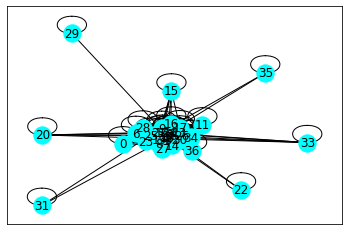

In [60]:
nx.draw_networkx(induced,node_color='cyan')

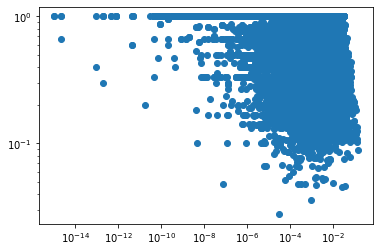

In [61]:
plt.plot(stats["centrality"], stats["C_i"], 'o')
plt.xscale("log")
plt.yscale("log")

In [68]:
#n=graph.number_of_nodes()
# This will take just too much time 
#single_link=list(nx.all_pairs_shortest_path_length(graph))
#distances=np.zeros((n,n))
# distances[i, j] is the length of the shortest path between i and j
#for i in range(n):
#    for j in range(n):
#        distances[i, j] = single_link[i][1][j]

https://scikit-learn.org/stable/modules/clustering.html

Note that affinity is pre computed here

In [ ]:
#from sklearn.cluster import AgglomerativeClustering
#cluster = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed')
#cluster.fit_predict(distances)
#print(cluster.labels_)

## Check out SNAP 
https://snap.stanford.edu/data/index.html#amazon
    
Data is generally in a text file format     

In [3]:
#C:\Users\Bhaskar\Desktop\PES2022_Jan_May\SharedCode\amazon0302.txt
g=nx.read_edgelist("Amazon0302.txt")

In [4]:
print(nx.transitivity(g))
print(nx.average_clustering(g))
#print(nx.diameter(g))


0.23608271612383297
0.419780014607673
